In [1]:
# Importing Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('space_server.csv')

In [4]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
data.shape

(10000, 18)

In [6]:
data = data.drop('objid', axis = 1)

In [7]:
data.isnull().any()   # No Null Values

ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  int64  
 8   rerun      10000 non-null  int64  
 9   camcol     10000 non-null  int64  
 10  field      10000 non-null  int64  
 11  specobjid  10000 non-null  float64
 12  class      10000 non-null  object 
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
dtypes: float64(9), int64(7), object(1)
memory usage: 1.3+ MB


In [9]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


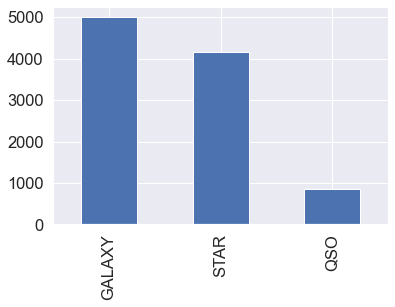

In [33]:
sns.set(font_scale=1.5) 
data['class'].value_counts().plot(kind = 'bar')
print(data['class'].value_counts())   #The Data is Unbalanced

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


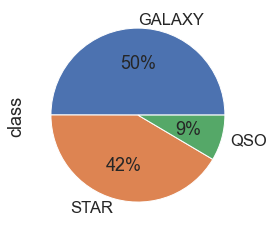

In [34]:
data['class'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
print(data['class'].value_counts())

In [35]:
4152/850

4.884705882352941

The Label QSO is underbalanced. We can use over-sampling to deal with the unbalanced dataset.

In [36]:
df = data.copy()

In [37]:
from sklearn.utils import shuffle
A= df[df['class'] == 'QSO']
B= df[df['class'] != 'QSO']
A_repeated = pd.concat([A]*5, ignore_index=True)
df2 = pd.concat([A_repeated,B])
df2 = shuffle(df2)
df2 = df2.reset_index(drop=True)

In [38]:
df2.head()   # the new dataset df2 which is balanced

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,226.738575,-0.769620,18.65641,18.67263,18.89631,19.07103,19.28297,752,301,2,556,4.521650e+18,QSO,1.104045,4016,55632,128
1,186.880549,-0.337642,17.60875,16.39866,15.94780,15.77919,15.73317,752,301,3,289,2.880080e+18,STAR,0.000095,2558,54140,111
2,162.617398,-0.114194,16.59828,15.03297,14.39962,14.15712,14.02344,756,301,3,312,2.881210e+18,STAR,-0.000085,2559,54208,117
3,133.535472,0.498567,17.23085,15.90602,15.25801,14.91961,14.62738,1239,301,5,88,5.269690e+17,GALAXY,0.028214,468,51912,174
4,129.041841,0.933492,19.10315,17.30518,16.38304,15.92978,15.58536,1239,301,6,58,5.396610e+18,GALAXY,0.084716,4793,55648,614


GALAXY    4998
QSO       4250
STAR      4152
Name: class, dtype: int64


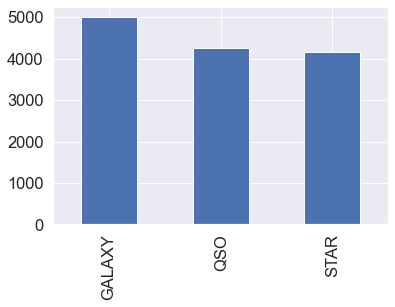

In [39]:
df2['class'].value_counts().plot(kind = 'bar')
print(df2['class'].value_counts())

Now the Dataset is balanced

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268C15E5F10>,
      dtype=object)

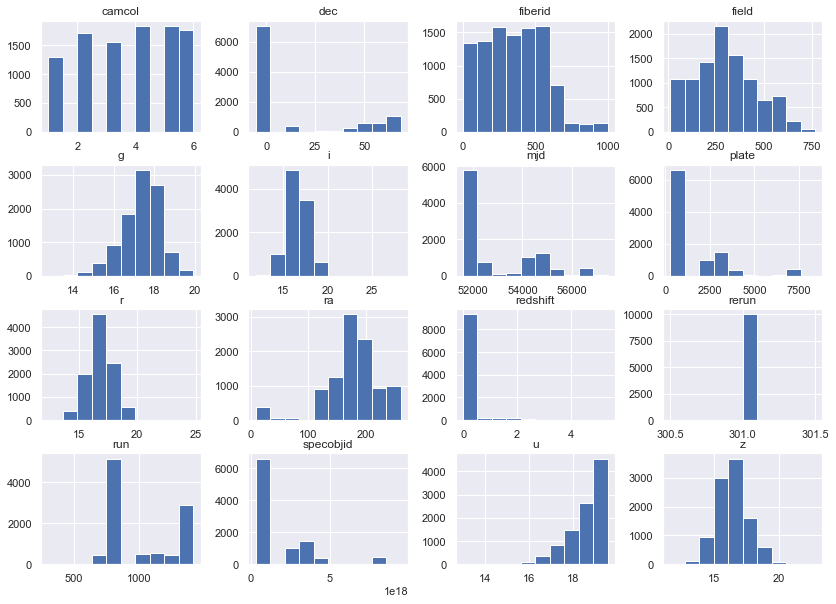

In [40]:
#plt.figure(figsize=(12,8))
sns.set(font_scale=1) 
df.hist(figsize=(14,10))

In [64]:
target = []
for i in df['class']:
    if i == 'GALAXY':
        k = 0
    elif i == 'STAR':
        k = 1
    else:
        k = 2
    target.append(k)

In [65]:
df_new = df.copy()
df_new['class'] = target

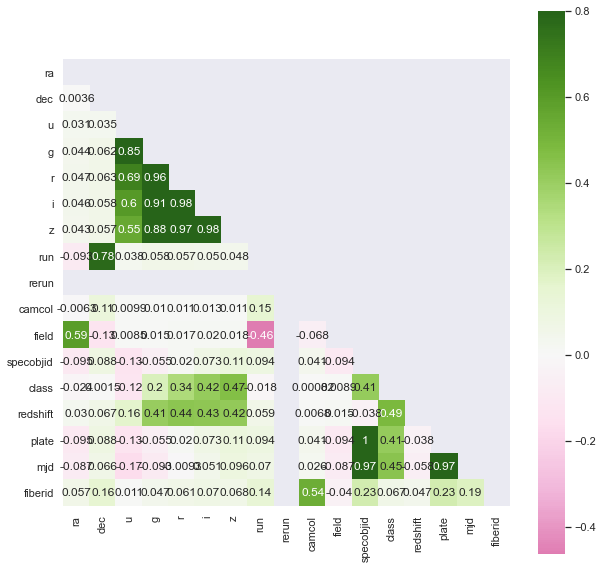

In [66]:
corrmat = df_new.corr()   # Corelation Matrix
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

There is strong corelation between some variables. We can actually remove some variables from the model since they will be redundent. e.g: plate and specobjid have corelation 1. We can keep one among them. 

In [43]:
df2.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [44]:
df2.shape

(13400, 17)

### Model Building 

In [45]:
X = df2.drop('class',axis = 1).values    # Attributes

In [46]:
y = df2['class'].values     # The target variable

In [47]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=48)

In [48]:
#Building Function for Model Testing
def classification_function(model_list):
    for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print("accuracy_score: ",accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print('\n')

In [50]:
#List of Models to be tested
model_list = [KMeans(),LogisticRegression(),SVC(),RandomForestClassifier()]

In [51]:
classification_function(model_list)

Model Name : KMeans()
accuracy_score:  0.0


Model Name : LogisticRegression()
accuracy_score:  0.38470149253731345


Model Name : SVC()
accuracy_score:  0.6152985074626866


Model Name : RandomForestClassifier()
accuracy_score:  0.9958955223880597




The Best Model is Random Forest

In [57]:
rnf = RandomForestClassifier()

In [59]:
rnf.fit(X_train,y_train)
pred = rnf.predict(X_test)
print('Model Name :', rnf)
print("Training Score: ", rnf.score(X_train, y_train))
print("Testing_score: ",accuracy_score(y_test,pred))

Model Name : RandomForestClassifier()
Training Score:  1.0
Testing_score:  0.9955223880597015


#### Parameters Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [60]:
rfc = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 700}


In [61]:
pred2 = CV_rfc.predict(X_test)
print('Model Name :', CV_rfc)
print("Training Score: ", CV_rfc.score(X_train, y_train))
print("Testing_score: ",accuracy_score(y_test,pred2))

Model Name : GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})
Training Score:  1.0
Testing_score:  0.9958955223880597


In [67]:
# Saving the Best Model
import joblib

# Saving the model as a pickle in a file
joblib.dump(CV_rfc,"spaceserverdata.pkl")

['spaceserverdata.pkl']